In [73]:
import pandas as pd
import nltk as tm
from nltk.corpus import stopwords
import wordcloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [74]:
pwd

'c:\\Users\\johan\\OneDrive - Uppsala universitet\\Dokument\\Termin 6\\Examensarbete\\Examensarbete_analys\\Examensarbete_analys'

<h1>Inl√§sning, transformering och kontroll av data</h1>

In [75]:

df = pd.read_csv("100svar.csv", encoding="utf-8", delimiter = ",")

In [76]:
df = df.drop(df.index[:3])
df = df.reset_index(drop=True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 42 columns):
 #   Column                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                              --------------  ----- 
 0   Tidst√§mpel                                                                                                          97 non-null     object
 1   K√∂n                                                                                                                 97 non-null     object
 2   Vilken √•rskurs g√•r du i?                                                                                            97 non-null     object
 3   Vilket av f√∂ljande beskriver b√§st ditt program?                                                                     97 non-null     object
 4   Hur m√•nga inv√•nare h

In [78]:
df.drop(columns="Tidst√§mpel", axis=1, inplace=True)

In [79]:
kolumner_att_konvertera = df.columns[:4]

# Konvertera datatypen f√∂r de valda kolumnerna till 'category'
df[kolumner_att_konvertera] = df[kolumner_att_konvertera].astype('category')


In [80]:
df['Hur m√•nga inv√•nare har orten d√§r du bor?'] = df['Hur m√•nga inv√•nare har orten d√§r du bor?'].replace({
    "0-10 000": "liten",
    "10-50 000": "liten",
    "50-100 000": "medel",
    "100-200 000": "stor",
    "200 000+": "stor"
})

C:\Users\johan\AppData\Local\Temp\ipykernel_18648\2101176683.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Hur m√•nga inv√•nare har orten d√§r du bor?'] = df['Hur m√•nga inv√•nare har orten d√§r du bor?'].replace({


In [81]:
kolumner_att_√§ndra = df.columns[[6, 7, 8, 9, 10]]

df[kolumner_att_√§ndra] = df[kolumner_att_√§ndra].replace({
    7: 1,
    6: 2,
    5: 3,
    3: 5,
    2: 6,
    7: 1
})

In [82]:
print(kolumner_att_√§ndra)

Index(['Jag v√§ljer "Godk√§nn alla cookies".', 'Jag v√§ljer "Till√•t alla". ',
       'Jag v√§ljer "Acceptera alla cookies". ',
       'Jag v√§ljer "Acceptera alla cookies". .1',
       'Jag v√§ljer "Till√•t alla". .1'],
      dtype='object')


<h1>Kategorisering</h1>

In [83]:
df_demografi = df.iloc[:,:6]

In [84]:
# V√§lj kolumnerna med index 19 till 27 (slutet √§r exklusivt s√• vi tar upp till 28)
utvalda_k = df.iloc[:, 17:29]
utvalda_k1 = df.iloc[:, 17:23]
utvalda_k2 = df.iloc[:, 23:29]
utvalda_a = df.iloc[:, 29:]
utvalda_a1 = df.iloc[:, 29:37]
utvalda_a2 = df.iloc[:, 37:]
utvalda_b = df.iloc[:, 6:17]
utvalda_b1_dark = df.iloc[:,[6,7,9]]
utvalda_b1_no_dark = df.iloc[:,[8,10]]
utvalda_b2 = df.iloc[:, 11:14]
utvalda_b3 = df.iloc[:, 14:17]

# Platta ut alla v√§rden till en l√•ng array och r√§kna ut medelv√§rde
medelv√§rde_k = utvalda_k.values.flatten().mean()
medelv√§rde_k1 = utvalda_k1.values.flatten().mean()
medelv√§rde_k2 = utvalda_k2.values.flatten().mean()
medelv√§rde_a = utvalda_a.values.flatten().mean()
medelv√§rde_a1 = utvalda_a1.values.flatten().mean()
medelv√§rde_a2 = utvalda_a2.values.flatten().mean()
medelv√§rde_b = utvalda_b.values.flatten().mean()
medelv√§rde_b1_dark = utvalda_b1_dark.values.flatten().mean()
medelv√§rde_b1_no_dark = utvalda_b1_no_dark.values.flatten().mean()
medelv√§rde_b2 = utvalda_b2.values.flatten().mean()
medelv√§rde_b3 = utvalda_b3.values.flatten().mean()

# Skapa ny DataFrame med en kolumn "K" och medelv√§rdet som enda v√§rde
df_kategoriserad = pd.DataFrame({
                      'K': [medelv√§rde_k],
                      'K_grundl√§ggande': [medelv√§rde_k1],
                      'K_integritet': [medelv√§rde_k2],
                      'A': [medelv√§rde_a],
                      'A_egen_data': [medelv√§rde_a1],
                      'A_gen_insamling': [medelv√§rde_a2],
                      'B': [medelv√§rde_b],
                      'B_bilder_dark': [medelv√§rde_b1_dark],
                      'B_bilder_no_dark': [medelv√§rde_b1_no_dark],
                      'B2_agerande': [medelv√§rde_b2],
                      'B3_aktivt agerande': [medelv√§rde_b3]
                      })

In [85]:
df_kategoriserad.head()

K  K_grundl√§ggande  K_integritet         A  A_egen_data  \
0  3.839347         3.652921      4.025773  4.246564     4.131443   

   A_gen_insamling         B  B_bilder_dark  B_bilder_no_dark  B2_agerande  \
0         4.476804  2.470478       2.024055          2.242268     2.996564   

   B3_aktivt agerande  
0            2.542955

In [86]:
!pip install semopy

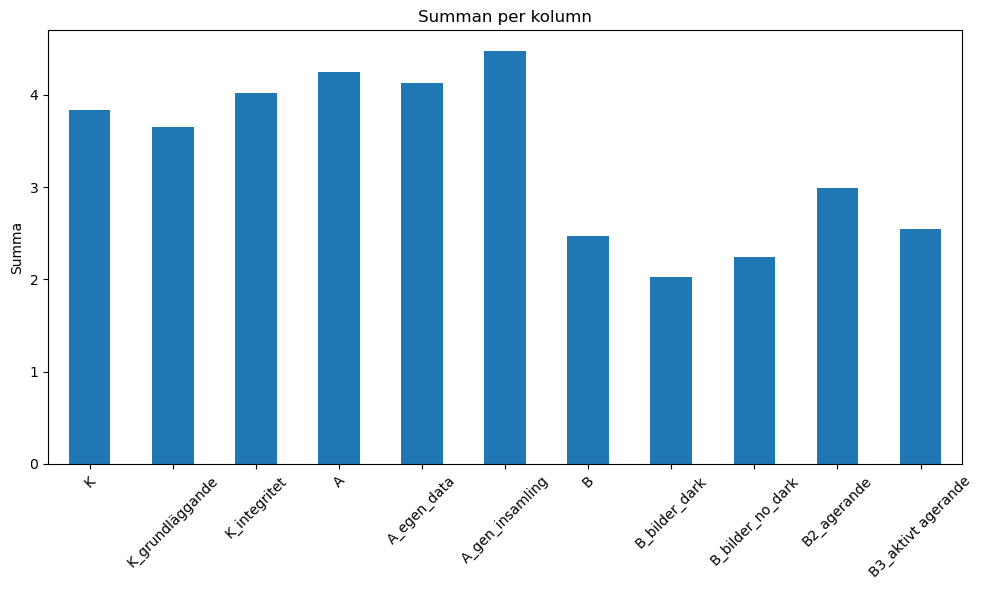

In [87]:
df_kategoriserad.sum().plot(kind='bar', figsize=(10, 6))
plt.title('Summan per kolumn')
plt.ylabel('Summa')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [88]:

medel_k = df.iloc[:, 17:29].mean(axis=1).round(2)
medel_k1 = df.iloc[:, 17:23].mean(axis=1)
medel_k2 = df.iloc[:, 23:29].mean(axis=1)
medel_a = df.iloc[:, 29:].mean(axis=1)
medel_a1 = df.iloc[:, 29:37].mean(axis=1)
medel_a2 = df.iloc[:, 37:].mean(axis=1)
medel_b = df.iloc[:, 6:17].mean(axis=1)
medel_b1_dark = df.iloc[:,[6,7,9]].mean(axis=1)
medel_b1_no_dark = df.iloc[:,[8,10]].mean(axis=1)
medel_b2 = df.iloc[:, 11:14].mean(axis=1)
medel_b3 = df.iloc[:, 14:17].mean(axis=1)


df_resp_sum = pd.DataFrame({
                      'K√∂n': df.iloc[:,0],
                      '√Örskurs': df.iloc[:,1],
                      'Program': df.iloc[:,2],
                      'Inv√•nare': df.iloc[:,3],
                      'K': medel_k,
                      'K_grundl√§ggande': medel_k1,
                      'K_integritet': medel_k2,
                      'A': medel_a,
                      'A_egen_data': medel_a1,
                      'A_gen_insamling': medel_a2,
                      'B': medel_b,
                      'B_bilder_dark': medel_b1_dark,
                      'B_bilder_no_dark': medel_b1_no_dark,
                      'B2_agerande': medel_b2,
                      'B3_aktivt agerande': medel_b3
                      })

In [89]:
df_resp_sum.head()

K√∂n    √Örskurs            Program Inv√•nare     K  K_grundl√§ggande  \
0        Kvinna  √Örskurs 3  Samh√§llsvetenskap    liten  2.33         1.166667   
1        Kvinna  √Örskurs 3     Naturvetenskap    liten  5.08         4.666667   
2        Kvinna  √Örskurs 3     Naturvetenskap    medel  2.92         2.833333   
3        Kvinna  √Örskurs 3     Naturvetenskap    medel  1.50         2.000000   
4  Vill ej ange  √Örskurs 2  Samh√§llsvetenskap    liten  5.58         5.500000   

   K_integritet         A  A_egen_data  A_gen_insamling         B  \
0      3.500000  4.666667        4.375             5.25  1.000000   
1      5.500000  4.416667        4.250             4.75  2.727273   
2      3.000000  5.083333        5.125             5.00  2.363636   
3      1.000000  6.833333        6.750             7.00  1.000000   
4      5.666667  4.166667        4.375             3.75  2.818182   

   B_bilder_dark  B_bilder_no_dark  B2_agerande  B3_aktivt agerande  
0       1.000000               1.0     1.000000            1.000000  
1       1.666667               2.0     4.000000            3.000000  
2       2.666667               1.0     1.666667            3.666667  
3       1.000000               1.0     1.000000            1.000000  
4       1.000000               1.0     4.333333            4.333333

<h1>Demografi</h1>

In [90]:
df_demografi.head()

K√∂n  Vilken √•rskurs g√•r du i?  \
0        Kvinna                √Örskurs 3   
1        Kvinna                √Örskurs 3   
2        Kvinna                √Örskurs 3   
3        Kvinna                √Örskurs 3   
4  Vill ej ange                √Örskurs 2   

  Vilket av f√∂ljande beskriver b√§st ditt program?   \
0                                Samh√§llsvetenskap   
1                                   Naturvetenskap   
2                                   Naturvetenskap   
3                                   Naturvetenskap   
4                                Samh√§llsvetenskap   

  Hur m√•nga inv√•nare har orten d√§r du bor?  Jag k√§nner till GDPR.   \
0                                    liten                       5   
1                                    liten                       6   
2                                    medel                       2   
3                                    medel                       5   
4                                    liten                       5   

   Jag litar p√• att hemsidor hanterar mina personuppgifter p√• ett ansvarsfullt s√§tt.    
0                                                  3                                    
1                                                  6                                    
2                                                  5                                    
3                                                  3                                    
4                                                  4

<module 'matplotlib.pyplot' from 'c:\\Users\\johan\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

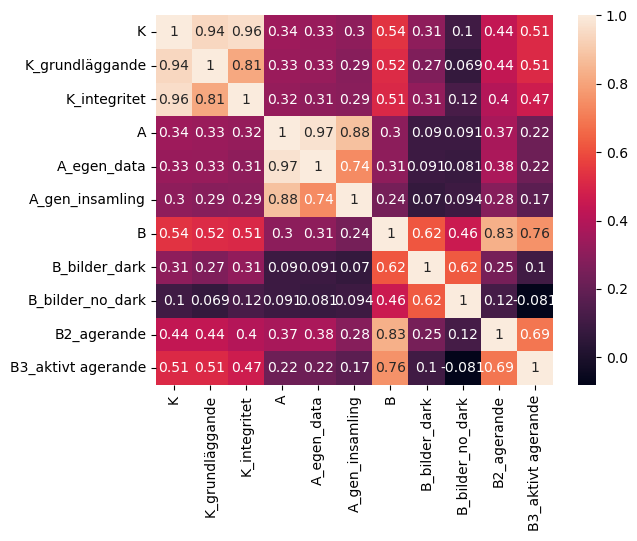

In [91]:
df_number = df_resp_sum.select_dtypes(include='number')
matrix = df_number.corr()
sns.heatmap(matrix,annot=True)
plt

<h1>Medelv√§rde av kategorier</h1>

<h1>Reliabilitetstest</h1>

In [92]:
def cronbach_alpha(df):
  k = df.shape[1]
  varians_total = df.sum(axis=1).var(ddof=1)
  varians_fr√•gor = df.var(axis=0,ddof=1).sum()

  alpha = (k / (k - 1)) * (1 - varians_fr√•gor / varians_total)

  return round(alpha, 3)

In [93]:
k_rel = cronbach_alpha(utvalda_k)
k1_rel = cronbach_alpha(utvalda_k1)
k2_rel = cronbach_alpha(utvalda_k2)

a_rel = cronbach_alpha(utvalda_a)
a1_rel = cronbach_alpha(utvalda_a1)
a2_rel = cronbach_alpha(utvalda_a2)

b_rel = cronbach_alpha(utvalda_b)
b1_dark_rel = cronbach_alpha(utvalda_b1_dark)
b1_no_dark_rel = cronbach_alpha(utvalda_b1_no_dark)
b2_rel = cronbach_alpha(utvalda_b2)
b3_rel = cronbach_alpha(utvalda_b3)

attityd = cronbach_alpha(df.iloc[:,29:])
beteende = cronbach_alpha(df.iloc[:, 6:17])
Beteende_bilder = cronbach_alpha(df.iloc[:, 11:17])
print("Kunskap =", k_rel, k1_rel, k2_rel, "attityd =", a_rel, a1_rel, a2_rel, "beteende =", b_rel, b1_dark_rel,b1_no_dark_rel,b2_rel,b3_rel)

Kunskap = 0.955 0.911 0.943 attityd = 0.93 0.921 0.803 beteende = 0.808 0.875 0.799 0.726 0.802


<h1>Korrelationstest</h1>

In [94]:
korrelation = df_resp_sum.iloc[:,4:].corr(method='pearson')

<module 'matplotlib.pyplot' from 'c:\\Users\\johan\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

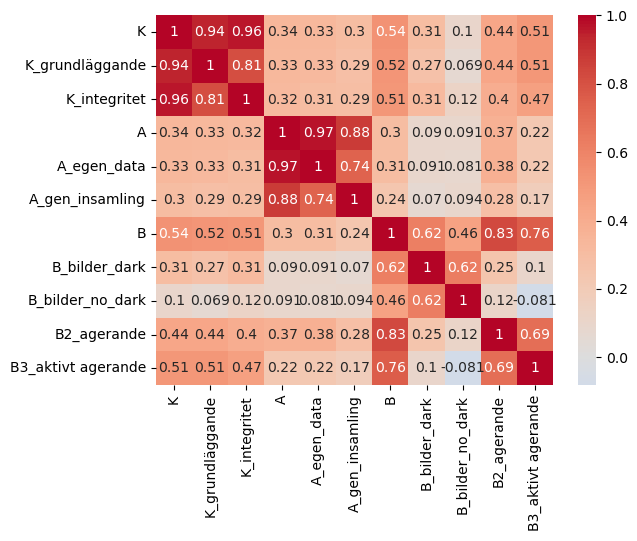

In [95]:
sns.heatmap(korrelation, annot=True, cmap='coolwarm', center=0)
plt

<h1>SEM</h1>

In [96]:
# 1. INSTALLERA n√∂dv√§ndiga paket f√∂rst via terminal:
# pip install pandas semopy openpyxl

import pandas as pd
from semopy import Model, Optimizer
from semopy.inspector import inspect

# # 2. L√ÑS IN DIN CSV
# df = pd.read_csv("Unders√∂kning om gymnasieelevers cookie-hantering (Svar) - Formul√§rsvar 1.csv")
# df.columns = df.columns.str.strip()

# 3. DEFINIERA KAB-GRUPPER baserat p√• index
behavior_cols = df.columns[5:17].tolist()
knowledge_cols = df.columns[17:29].tolist()
attitude_cols = df.columns[29:].tolist()

# 4. D√ñP OM kolumner till enklare namn
rename_map = {}
for i, col in enumerate(knowledge_cols):
    rename_map[col] = f"K{i+1}"
for i, col in enumerate(attitude_cols):
    rename_map[col] = f"A{i+1}"
for i, col in enumerate(behavior_cols):
    rename_map[col] = f"B{i+1}"

df_clean = df.rename(columns=rename_map)

# 5. SKAPA MODELL i semopy-syntax
model_desc = f"""
Knowledge =~ {' + '.join(rename_map[c] for c in knowledge_cols)}
Attitude  =~ {' + '.join(rename_map[c] for c in attitude_cols)}
Behavior  =~ {' + '.join(rename_map[c] for c in behavior_cols)}

Attitude ~ Knowledge
Behavior ~ Attitude
"""

# 6. Rensa bort tomma rader f√∂r SEM
df_clean = df_clean.dropna(subset=rename_map.values())

# 7. BYGG OCH TR√ÑNA MODELLEN
model = Model(model_desc)
model.fit(df_clean)

# 8. VISA RESULTAT
results = inspect(model)
print("\n--- SEM Resultat (koefficienter & p-v√§rden) ---")
print(results)





--- SEM Resultat (koefficienter & p-v√§rden) ---
        lval  op       rval  Estimate  Std. Err   z-value   p-value
0   Attitude   ~  Knowledge  0.339025  0.111175  3.049478  0.002292
1   Behavior   ~   Attitude -0.028018  0.043087 -0.650277  0.515514
2         K1   ~  Knowledge  1.000000         -         -         -
3         K2   ~  Knowledge  1.241245  0.129366  9.594838       0.0
4         K3   ~  Knowledge  0.962468   0.13993  6.878196       0.0
..       ...  ..        ...       ...       ...       ...       ...
72        K5  ~~         K5  1.534134  0.233191  6.578874       0.0
73        K6  ~~         K6  0.844075  0.140196  6.020678       0.0
74        K7  ~~         K7  1.574712  0.243645  6.463152       0.0
75        K8  ~~         K8  1.018815  0.168189   6.05756       0.0
76        K9  ~~         K9  1.103882  0.181191  6.092354       0.0

[77 rows x 7 columns]


In [97]:
from semopy.inspector import inspect

# H√§mta standardiserade v√§rden
estimates = inspect(model)

# R√§kna ut R¬≤ manuellt
def calculate_r2(est_df, dependent_var):
    effects = est_df[(est_df["op"] == "~") & (est_df["lval"] == dependent_var)]
    r2 = sum(effects["Estimate"]**2)
    return r2

dependent_vars = ["Attitude", "Behavior"]

print("\n--- R¬≤ f√∂r beroende latenta variabler ---")
for var in dependent_vars:
    r2_val = calculate_r2(estimates, var)
    print(f"{var}: {r2_val:.3f}")




--- R¬≤ f√∂r beroende latenta variabler ---
Attitude: 0.115
Behavior: 0.001


In [98]:
from semopy import semplot

# Skapa en PDF- eller PNG-bild av modellen
semplot(model, 'kab_model.png')  # eller .pdf
print("Modellen √§r sparad som kab_model.png")


Modellen √§r sparad som kab_model.png


<h1>T-test/ANOVA</h1>

***T-Test f√∂r grupper som k√§nner till/ inte k√§nner till GDPR***

-   Resultaten fr√•n t-testerna visar att det inte finns n√•gra statistiskt signifikanta skillnader i kunskap, attityd eller beteende mellan elever som rapporterar l√•g respektive h√∂g k√§nnedom om GDPR (p > 0.05). Detta tyder p√• att sj√§lvupplevd GDPR-k√§nnedom inte n√∂dv√§ndigtvis inneb√§r en djupare f√∂rst√•else f√∂r cookies, inte heller en mer integritetsmedveten attityd eller f√∂r√§ndrat beteende. Resultatet kan ses i ljuset av den s√• kallade privacy paradox, d√§r individer uttrycker oro f√∂r sin integritet men inte agerar i linje med denna oro. Det antyder att insatser som syftar till att √∂ka medvetenheten om integritet beh√∂ver g√• bortom ren informationsspridning och i st√§llet fokusera p√• att √∂ka faktisk f√∂rst√•else och anv√§ndarkompetens.

In [99]:
df_tTest = df_resp_sum.copy()

gdpr_k√§nnedom = df.iloc[:, 31]

df_tTest['Integritet_online'] = gdpr_k√§nnedom

l√•g_k√§nnedom = df_tTest[df_tTest['Integritet_online'] < 4]
h√∂g_k√§nnedom = df_tTest[df_tTest['Integritet_online'] > 4]

from scipy.stats import ttest_ind

t_k = ttest_ind(h√∂g_k√§nnedom['K'], l√•g_k√§nnedom['K'], nan_policy='omit')
t_a = ttest_ind(h√∂g_k√§nnedom['A'], l√•g_k√§nnedom['A'], nan_policy='omit')
t_b = ttest_ind(h√∂g_k√§nnedom['B'], l√•g_k√§nnedom['B'], nan_policy='omit')

print("üìò T-test: Kunskap (K)")
print(f"  t = {t_k.statistic:.3f}, p = {t_k.pvalue:.4f}")

print("üìó T-test: Attityd (A)")
print(f"  t = {t_a.statistic:.3f}, p = {t_a.pvalue:.4f}")

print("üìô T-test: Beteende (B)")
print(f"  t = {t_b.statistic:.3f}, p = {t_b.pvalue:.4f}")




üìò T-test: Kunskap (K)
  t = 3.906, p = 0.0002
üìó T-test: Attityd (A)
  t = 6.368, p = 0.0000
üìô T-test: Beteende (B)
  t = 3.444, p = 0.0009


In [100]:
import matplotlib.pyplot as plt

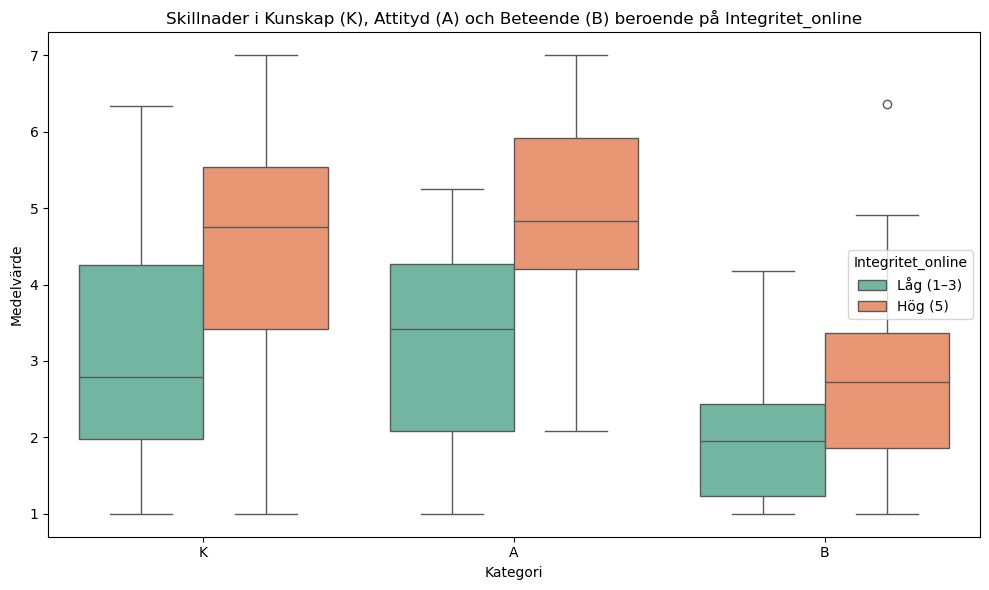

In [101]:
df_tTest['Integritet_online_grupp'] = df_tTest['Integritet_online'].apply(
    lambda x: 'L√•g (1‚Äì3)' if x < 4 else ('H√∂g (5)' if x > 4 else None)
)

df_melted = df_tTest.melt(id_vars="Integritet_online_grupp", value_vars=["K", "A", "B"],
                          var_name="Kategori", value_name="V√§rde")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x="Kategori", y="V√§rde", hue="Integritet_online_grupp", palette="Set2")
plt.title("Skillnader i Kunskap (K), Attityd (A) och Beteende (B) beroende p√• Integritet_online")
plt.ylabel("Medelv√§rde")
plt.xlabel("Kategori")
plt.legend(title="Integritet_online")
plt.tight_layout()
plt.show()



***T-TEst f√∂r skillnad mellan k√∂n***

Resultaten fr√•n t-tester visar att det finns en statistiskt signifikant k√∂nsskillnad i b√•de kunskapsniv√• och beteende kopplat till cookies, men inte i attityd. M√§n och kvinnor skiljer sig allts√• i hur mycket de vet om cookies, samt hur de agerar i praktiken (t.ex. raderar cookies eller blockerar sp√•rning), men har en liknande inst√§llning till datainsamling. Det antyder att k√∂n kan vara en relevant faktor vid utformning av informationsinsatser, s√§rskilt om m√•let √§r att √∂ka faktisk f√∂rst√•else eller f√∂r√§ndra beteende. Att attityden d√§remot inte skiljer sig kan tyda p√• att b√•de m√§n och kvinnor i liknande grad v√§rderar digital integritet, men att de oms√§tter den i handling p√• olika s√§tt.

In [102]:
from scipy.stats import ttest_ind

# L√§gg till k√∂n i df_resp_sum (index 1 = k√∂nskolumn i ursprunglig df)


# Skapa tv√• grupper
kvinnor = df_resp_sum[df_resp_sum['K√∂n'] == 'Kvinna']
m√§n = df_resp_sum[df_resp_sum['K√∂n'] == 'Man']

# K√∂r t-tester f√∂r K, A, B
t_k = ttest_ind(kvinnor['K'], m√§n['K'], nan_policy='omit')
t_a = ttest_ind(kvinnor['A'], m√§n['A'], nan_policy='omit')
t_b = ttest_ind(kvinnor['B'], m√§n['B'], nan_policy='omit')

# Visa resultat
print("üìò T-test: Kunskap (K√∂nsskillnad)")
print(f"  t = {t_k.statistic:.3f}, p = {t_k.pvalue:.4f}")

print("üìó T-test: Attityd (K√∂nsskillnad)")
print(f"  t = {t_a.statistic:.3f}, p = {t_a.pvalue:.4f}")

print("üìô T-test: Beteende (K√∂nsskillnad)")
print(f"  t = {t_b.statistic:.3f}, p = {t_b.pvalue:.4f}")


üìò T-test: Kunskap (K√∂nsskillnad)
  t = -2.662, p = 0.0091
üìó T-test: Attityd (K√∂nsskillnad)
  t = 0.905, p = 0.3676
üìô T-test: Beteende (K√∂nsskillnad)
  t = -2.241, p = 0.0274


In [103]:
print(kvinnor['B'].mean(), m√§n['B'].mean())

2.1143695014662756 2.6349650349650346


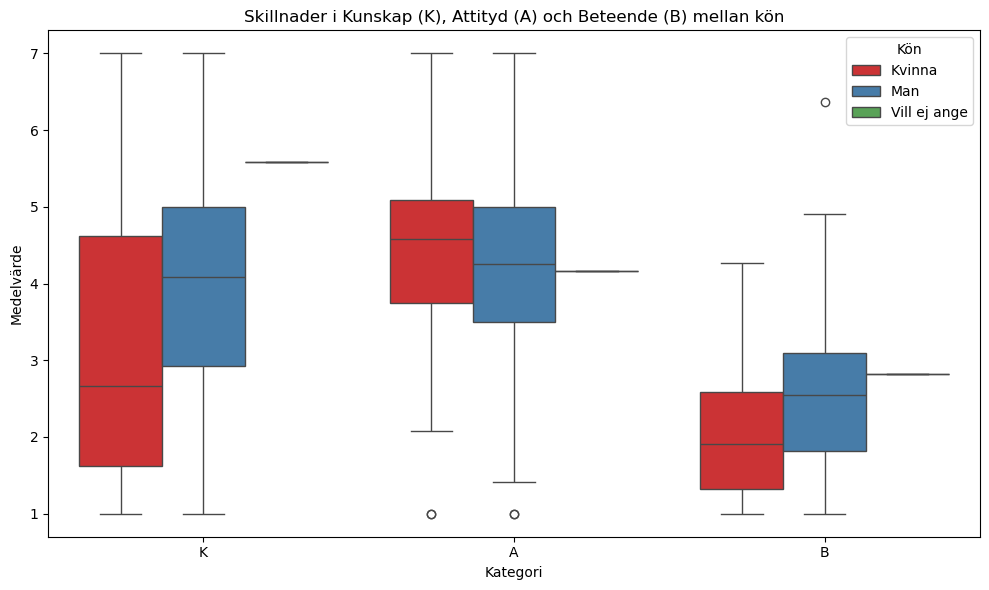

In [104]:
# G√∂r om till l√•ngform f√∂r seaborn
df_melted = df_resp_sum.melt(id_vars="K√∂n", value_vars=["K", "A", "B"], 
                             var_name="Kategori", value_name="V√§rde")

# Rita boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x="Kategori", y="V√§rde", hue="K√∂n", palette="Set1")
plt.title("Skillnader i Kunskap (K), Attityd (A) och Beteende (B) mellan k√∂n")
plt.ylabel("Medelv√§rde")
plt.xlabel("Kategori")
plt.legend(title="K√∂n")
plt.tight_layout()
plt.show()

In [105]:
from scipy.stats import ttest_rel

# Exempel ‚Äì byt till dina faktiska kolumnnamn!
t_stat, p_value = ttest_rel(df_resp_sum['B_bilder_no_dark'], df_resp_sum['B_bilder_dark'])

print("üìä Parat t-test ‚Äì ben√§genhet att neka cookies")
print(f"  t = {t_stat:.3f}, p = {p_value:.4f}")


üìä Parat t-test ‚Äì ben√§genhet att neka cookies
  t = 1.774, p = 0.0792


C:\Users\johan\AppData\Local\Temp\ipykernel_18648\3881499562.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_melted, x="Typ av notis", y="Svar", palette="Set2", ci="sd")
C:\Users\johan\AppData\Local\Temp\ipykernel_18648\3881499562.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_melted, x="Typ av notis", y="Svar", palette="Set2", ci="sd")


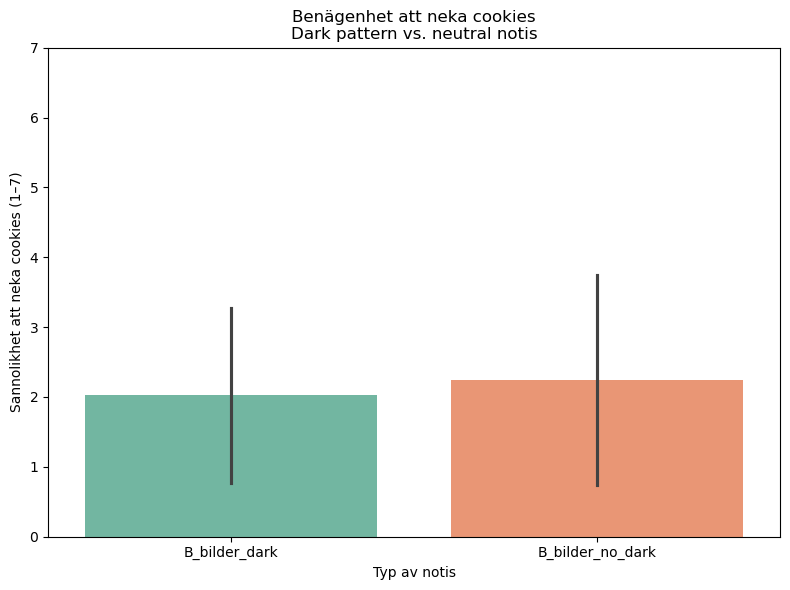

In [106]:
# Sm√§lt till l√•ng format f√∂r seaborn
df_melted = df_resp_sum.melt(value_vars=["B_bilder_dark", "B_bilder_no_dark"],
                           var_name="Typ av notis", value_name="Svar")

# Rita barplot med medelv√§rden
plt.figure(figsize=(8, 6))
sns.barplot(data=df_melted, x="Typ av notis", y="Svar", palette="Set2", ci="sd")
plt.title("Ben√§genhet att neka cookies\nDark pattern vs. neutral notis")
plt.ylabel("Sannolikhet att neka cookies (1‚Äì7)")
plt.xlabel("Typ av notis")
plt.ylim(0, 7)
plt.tight_layout()
plt.show()

In [107]:
df_resp_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   K√∂n                 97 non-null     category
 1   √Örskurs             97 non-null     category
 2   Program             97 non-null     category
 3   Inv√•nare            97 non-null     category
 4   K                   97 non-null     float64 
 5   K_grundl√§ggande     97 non-null     float64 
 6   K_integritet        97 non-null     float64 
 7   A                   97 non-null     float64 
 8   A_egen_data         97 non-null     float64 
 9   A_gen_insamling     97 non-null     float64 
 10  B                   97 non-null     float64 
 11  B_bilder_dark       97 non-null     float64 
 12  B_bilder_no_dark    97 non-null     float64 
 13  B2_agerande         97 non-null     float64 
 14  B3_aktivt agerande  97 non-null     float64 
dtypes: category(4), float64(11)
memory usa